In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os

sys.path.append('/home/user/deep-learning/')
sys.path.append('/home/gbaasch/projects/def-revins/gbaasch/deep-learning')
sys.path.append('../../methods')

In [3]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
from fastai.metrics import root_mean_squared_error

import matplotlib.pyplot as plt
import pandas as pd

from BlackBoxMethod import ResNet, BasicBlock, RNNRegression
from BuildingDataset import BuildingDataset, DataBunch, get_dls

from training.exp.learner import Learner
from training.exp.runner import prep_run_vanilla, prep_one_cycle
# from datahandlers.exp.basic_databunch import DataBunch, get_dls

# Params for papermill

In [4]:
# this cell is tagged `parameters`
label_idx   = 5 
network     = 'cnn'
run_count   = 1
train_fname = '../../hdf5/train.hdf5'
valid_fname  = '../../hdf5/test.hdf5'

In [5]:
# Parameters
network = "cnn"
label_idx = 1
train_fname = "../../hdf5/train.hdf5"
valid_fname = "../../hdf5/test.hdf5"


In [6]:
save_name = str(label_idx) + '_' + network + '_' + str(run_count)

In [7]:
label_idx, network, run_count, save_name

(1, 'cnn', 1, '1_cnn_1')

# Prep Data

In [8]:
# train_fname, valid_fname = 'train.hdf5', 'test.hdf5'
batch_size = 100

train_ds = BuildingDataset(train_fname, label_idx)
valid_ds = BuildingDataset(valid_fname, label_idx)

len(train_ds), len(valid_ds)

data = DataBunch(*get_dls(train_ds, valid_ds, batch_size))
data.train_ds[0][0].shape

torch.Size([2000, 4])

# Train

In [9]:
use_gpu = True

def run_model(model, opt, db, lr=0.01, epochs=10):
    # prepare basic training
    loss = F.mse_loss
    metrics = [root_mean_squared_error]
    learner = Learner(model, opt, db, loss, use_gpu=use_gpu)
    # run training loop
    run = prep_run_vanilla(metrics, use_cuda=use_gpu)
    run.fit(epochs, learner)
    run.recorder.plot_loss()
    return learner

def run_model_one_cycle(model, opt, db, epochs=10):
    # prepare basic training
    loss = F.mse_loss
    metrics = [root_mean_squared_error]
    learner = Learner(model, opt, db, loss, use_gpu=use_gpu)
    # run training loop
    run = prep_one_cycle(use_cuda=use_gpu, metrics=metrics, min_lr=0.00001, max_lr=0.001)
    run.fit(epochs, learner)
    run.recorder.plot_loss()
    return learner

In [10]:
def resnet(ni, **kwargs):
    model = ResNet(ni, BasicBlock, [3, 4, 6, 3, 3], **kwargs)
    return model

In [11]:
if network == 'cnn':
    model = resnet(ni=4, num_classes=1)
    
elif network == 'rnn':
    model = RNNRegression(ni=4)
    
opt = torch.optim.Adam(model.parameters())

epoch      train loss          valid loss     root_mean_squared_error
0          4572.5403           4336.6655            65.8488       


1          4331.1507           4151.1398            64.4254       


2          4188.4813           4050.0045            63.6371       


3          4083.2655           3946.6328            62.8203       


4          3990.3537           3880.5278            62.2929       


5          3893.4429           3754.0974            61.2701       


6          3783.3991           3670.5372            60.5829       


7          3652.0152           3527.6266            59.3916       


8          3491.8775           3355.4541            57.9243       


9          3295.8223           3177.1189            56.3598       


10         3063.3617           2860.9739            53.4799       


11         2785.3464           2621.5471            51.1873       


12         2473.8706           2326.6203            48.2261       


13         2117.7987           1983.9459            44.5212       


14         1727.2743           1586.9724            39.7712       


15         1312.4513           1211.6597            34.7273       


16          912.1836            792.3254            27.9883       


17          561.3149            428.0219            20.4566       


18          299.2478            296.5487            17.1421       


19          135.6088            170.5093            12.8875       


20          55.2303             25.8417              4.9156       


21          17.6641             43.5329              5.7827       


22          12.7534             170.4633            10.3421       


23          11.8185              28.234               4.77        


24           5.6897              2.4048              1.4791       


25           5.946              96.1942              8.9492       


26            4.39              25.7265              4.4039       


27           5.2772             26.8121              4.8935       


28           5.8274              5.7122              2.3316       


29           4.9067              2.1394              1.4316       


30           4.5862              3.4612              1.8008       


31           4.302              26.6019              4.7152       


32           5.6315              6.145               2.3916       


33           3.9393              6.974               2.5402       


34           5.5483             29.5321              4.695        


35           5.1145             21.0803              4.1244       


36           4.4359              5.1674              2.2279       


37           5.3483             10.0565              3.0802       


38           5.7102              3.6849              1.8397       


39           4.3971             204.1097            12.2325       


40           5.955               3.5902              1.878        


41           4.545              19.0457              3.8804       


42           4.6613             34.7915              5.8624       


43           4.6922             73.6549              7.0242       


44           6.0946             19.9664              4.1363       


45           5.1495             18.0903              3.6624       


46           4.191              124.5019            10.1931       


47           8.2398             17.2858              4.1145       


48           6.3226             35.2604              5.903        


49           5.9599             12.3155              3.2034       


50           5.089               3.0841              1.6549       


51           4.9344             45.9008              5.9675       


52           4.8014              4.3651              2.0714       


53           4.4516             104.8156             8.4167       


54           4.1343             14.9234              3.8223       


55           4.3318             11.8361              3.3827       


56           3.4229              4.6096              2.1107       


57           4.0642             41.6503              5.8442       


58           4.0479             30.4841              4.7031       


59           4.3138              3.0748              1.6727       


60           4.2924             137.4621            11.2121       


61           5.3765             39.4765              5.6219       


62           4.9936             96.7688              8.6256       


63           4.9743             23.4103              4.6257       


64           5.7278             130.5112             9.5788       


65           4.2127              6.3048              2.3047       


66           3.9829              7.2563              2.3921       


67           5.3767              4.4541              2.0342       


68           4.0636             116.1802             9.6801       


69           4.2669             51.6664              6.0302       


70           3.9275             10.0989              2.9209       


71           3.1387             85.1659              7.6599       


72           3.7934             169.6521            11.3884       


73           4.1258             43.7264              5.6023       


74           3.4988             150.6784             11.279       


75           4.1255              7.3594              2.6688       


76           4.0028             149.8614            10.3819       


77           3.7343             14.1096              3.3011       


78           3.4386             74.3677              7.135        


79           3.7811             48.2729              6.8415       


80           4.4957             28.8707              4.5443       


81           3.6264              3.8353              1.8622       


82           3.721               7.7745              2.642        


83           3.6739             74.4256              7.5469       


84           3.4343              2.6118              1.5977       


85           3.5953              6.4378              2.4096       


86           3.1807             124.7485             9.1166       


87           3.9469              4.7099              2.1319       


88           3.3074              4.446               2.0695       


89           3.4024             156.9125            10.5809       


90           3.4674             129.2293            10.5674       


91           6.171              46.2695              5.6679       


92           3.3502              8.4167              2.7758       


93           3.5316              4.6861              2.106        


94           3.0754              7.3944              2.5778       


95           3.2922              7.6345              2.5783       


96           3.0753              2.495               1.5567       


97           3.3458              7.7953              2.6071       


98           3.5041             15.8902              3.8666       


99           2.934               12.981              3.5204       


100          3.1672              1.1974              1.0882       


101          3.5285             14.0488              3.2507       


102          2.5006             14.0961              3.427        


103          2.7242             208.372             13.2758       


104          3.1659             142.0856            10.4877       


105          2.7933              7.829               2.684        


106          3.0102             33.2701              4.8441       


107          2.5819             23.2285              4.5247       


108          2.7897             69.7325              6.8433       


109          4.1805              5.4812              2.2677       


110          3.5311              2.3887              1.4583       


111          3.0231             45.3521              5.7147       


112          2.6387             15.0023              3.6301       


113          2.3583              2.9827              1.7151       


114          2.7203             10.3521              3.0336       


115          3.0408             30.3791              4.6578       


116          2.5039             18.4537              3.6995       


117          2.7256              5.0419              2.2009       


118          2.8917              5.7271              2.1943       


119          2.374               6.4575              2.2525       


120          2.3415             139.5989            11.1046       


121          3.0792              3.4784              1.7711       


122          2.6993             35.8516              5.2356       


123          2.587              35.1134              5.7163       


124          2.5843             26.7965              4.5746       


125          2.5478             16.8426              3.9509       


126          2.545              15.1801              3.5049       


127          2.4953              6.5498              2.5426       


128          2.5006              6.1175              2.4549       


129          2.0765              3.2144              1.7221       


130          1.9573              9.9991              3.1076       


131          2.3034              17.04               3.6944       


132          2.0833             22.2378              4.3182       


133          2.4129              1.9153              1.3496       


134          2.0671              2.7367              1.6001       


135          1.8441              6.8882              2.3406       


136          1.8215              1.8797              1.341        


137          1.9647             12.9542              3.3566       


138          1.9009             29.9927              4.7167       


139          2.0134              1.2696              1.1082       


140          1.8223              2.1146              1.3952       


141          1.7854             13.6744              3.4867       


142          2.1659              1.7018              1.2598       


143          1.8244              1.6197              1.2442       


144          1.7511             21.2039              3.9069       


145          1.6353              2.397               1.5315       


146          1.5722              7.9761              2.779        


147          1.6832              4.4741              2.0343       


148          1.549               4.0237              1.8689       


149          1.5895              3.0659              1.7158       


150          1.5701              5.3827              2.1597       


151          1.3742              2.2062              1.4161       


152          1.4852              3.1348              1.7534       


153          1.3013              8.7979              2.6459       


154          1.431               1.1843              1.0797       


155          1.3137              1.1524              1.0654       


156          1.2888             11.2939              3.3393       


157          1.3605             61.4027              6.6041       


158          1.5928             19.3754              4.0509       


159          1.5964              2.8919              1.6897       


160          1.2601             12.0339              3.2573       


161          1.1699              4.0319              1.9496       


162          1.2124              1.6489              1.2604       


163          1.0893             11.8426              2.9782       


164          1.2418             21.7205              3.9836       


165          1.1583              6.4439              2.2999       


166          1.7158              2.3916              1.5363       


167          1.0605              4.972               2.2177       


168          1.1277              1.5964              1.2429       


169          1.1293              4.9771              2.1384       


170          1.2234              1.3899              1.1713       


171          1.178               4.3252              1.9659       


172          1.1317              1.5436              1.2218       


173          0.9957              1.2108              1.087        


174          1.0858              2.2807              1.4762       


175          0.9379              2.6138              1.5337       


176          1.0765              1.023               1.0018       


177          1.2089              2.4291              1.4782       


178          0.9327              1.6799              1.2617       


179          0.9966              0.9955              0.9907       


180          1.0578             14.4841              3.4494       


181          1.0519              1.7168              1.3025       


182          0.949               1.1175              1.0485       


183          0.8396              1.1543              1.0647       


184          0.8003              3.2702              1.7688       


185          0.9132              1.6377              1.2747       


186          0.8337              1.4498              1.1914       


187          0.947               1.966               1.3823       


188          0.8998              1.0573              1.0195       


189          0.8413              0.9647              0.9751       


190          0.7744              1.2897              1.1201       


191          0.8097             10.2541              2.7775       


192          0.779               2.6858              1.6296       


193          0.7876              2.0074              1.3617       


194          0.8173              1.2454              1.1056       


195          0.8168              1.0775              1.0277       


196          0.8519              1.2452              1.1057       


197          0.7983              3.0233              1.7248       


198          0.8583              1.098               1.0393       


199          0.9417              1.8862              1.3358       


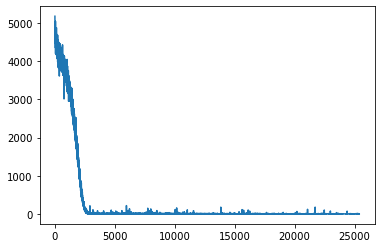

In [12]:
learner = run_model_one_cycle(model, opt, data, epochs=200)

# Predict

In [13]:
# mpath = f'models/cnn_inf' 
mpath = os.path.join('models', save_name)

In [14]:
torch.save(model.state_dict(), mpath) 

In [15]:
state = torch.load(mpath)
if network == 'cnn':
    m = resnet(ni=4, num_classes=1)
    
elif network == 'rnn':
    m = RNNRegression(ni=4)

ml = m.cuda()
ml.load_state_dict(state)
ml.eval();

In [16]:
del model
torch.cuda.empty_cache()

In [17]:
valid_preds = ml(data.valid_dl.x.cuda()) 

### Predict Train

In [18]:
# plt.scatter(data.train_dl.y, train_preds.tolist());
# plt.plot(data.train_dl.y, data.train_dl.y);
# plt.grid()

### Predict Valid

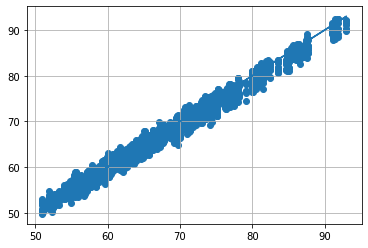

In [19]:
plt.scatter(data.valid_dl.y, valid_preds.tolist());
plt.plot(data.valid_dl.y, data.valid_dl.y);
plt.grid()

# Predict each case

In [20]:
cases_no_infiltration = [
    ('victoria', 'control_concrete', 'False'),
    ('victoria', 'control_concrete', 'True'),
    ('victoria', 'control_wood', 'False'),
    ('victoria', 'control_wood', 'True'),
    ('chicago', 'control_concrete', 'False'),
    ('chicago', 'control_concrete', 'True'),
    ('chicago', 'control_wood', 'False'),
    ('chicago', 'control_wood', 'True'),
    ('victoria', 'control_concrete_inf', 'False'),
    ('victoria', 'control_concrete_inf', 'True'),
    ('victoria', 'control_wood_inf', 'False'),
    ('victoria', 'control_wood_inf', 'True'),
    ('chicago', 'control_concrete_inf', 'False'),
    ('chicago', 'control_concrete_inf', 'True'),
    ('chicago', 'control_wood_inf', 'False'),
    ('chicago', 'control_wood_inf', 'True')
]

In [21]:
def case_string(case):
    case_name = ''
    for c in case:
        case_name += c #+ '\n'
    return case_name

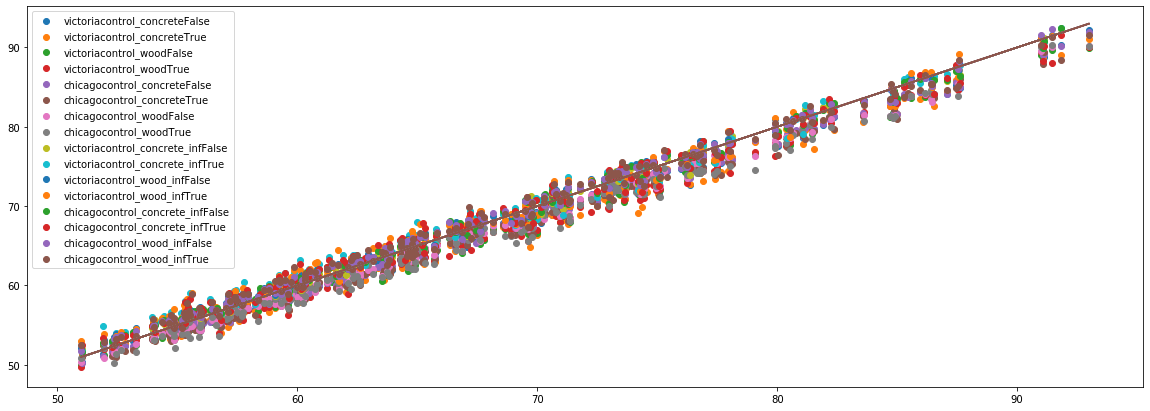

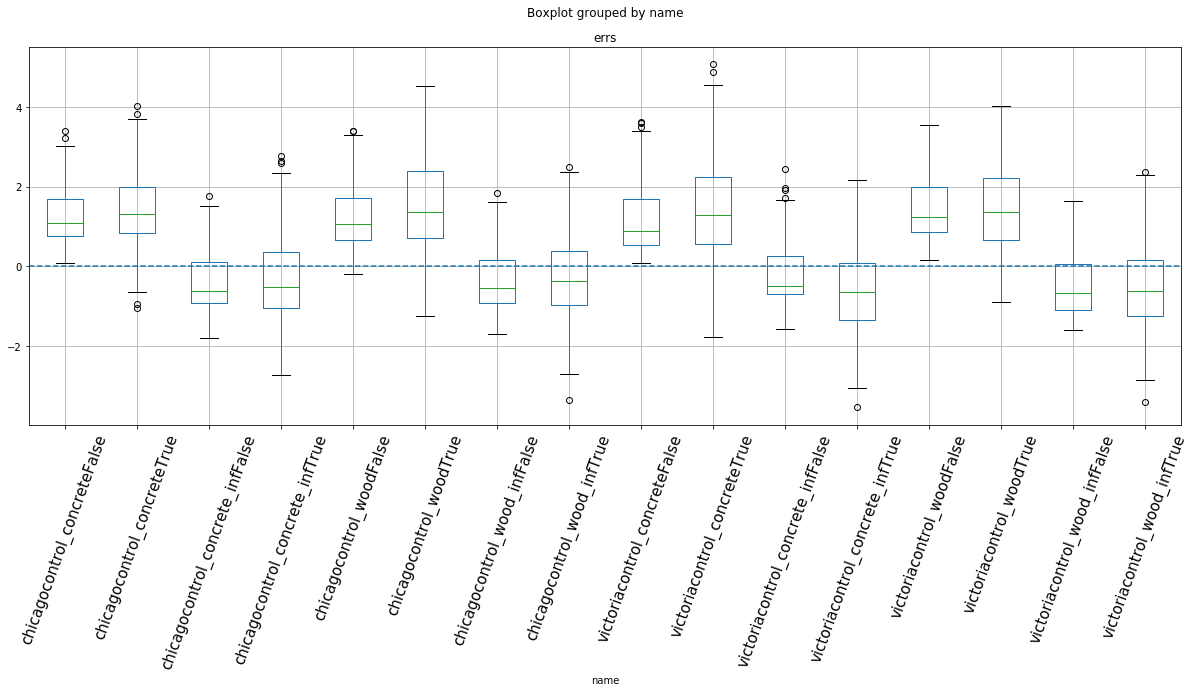

In [22]:
df_errs_all = pd.DataFrame()

plt.figure(figsize=(20,7))

for case in cases_no_infiltration:
    x, y = data.valid_dl.get_by_metadata(list(case))
    preds = ml(x.cuda()) 
    case_name = case_string(case)
    plt.scatter(y, preds.tolist(), label=case_name);
    plt.plot(y, y);
    plt.grid()
#     plt.show()
    df_errors = pd.DataFrame()
    df_errors['errs'] = y.sub(preds.to("cpu")).tolist()
    df_errors['name'] = case_name
    df_errs_all = df_errs_all.append(df_errors)
plt.legend()
plt.show()  

df_errs_all.boxplot(column='errs', by='name', figsize=(20, 7))
plt.axhline(0, 0, 1, label='No Error', linestyle='--')
plt.xticks(rotation=70, fontsize=15);